# PROYECTO (MODULO 1, TITANIC)

## INTRODUCCION

Hoy les presentaré un proyecto de análisis de datos que es uno de los eventos más icónicos y trágicos de la historia: el hundimiento del Titanic.
En este proyecto, exploraremos un conjunto de datos detallado del Titanic que incluye información sobre los pasajeros, como sus edades, género, clases de pasajeros, tarifas... Nuestro objetivo es analizar este conjunto de datos para responder preguntas críticas, como: ¿Hubo diferencias significativas en la probabilidad de sobrevivir entre distintos grupos de pasajeros? A lo largo de esta presentación, les mostraré los pasos que seguimos para explorar y analizar estos datos, destacando los más interesantes. 

#### IMPORTAR LIBRERIAS

In [2]:
# IMPORTAMOS TODAS LAS LIBRERIAS 
import numpy as np
import pandas as pd
import matplotlib as mtl
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as plt
import plotly.express as px


##### CARGAR LOS DATOS DELDE EL ARCHIVO CSV, LEER Y CONVERTIR EN UN DATAFRAME

In [3]:
## Cargar los datos desde el archivo CSV en URL
URL_titanic = r"C:\Users\34650\Downloads\titanic.csv"

In [4]:
#Leemos el archivo csv (URL) y creamos un DataFRame(df3) con la base de datos
df3 = pd.read_csv(URL_titanic)

##### Imprimimos el data set

In [5]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### INFORMACION SOBRE EL DATAFRAME(DF3)

In [6]:
df3.shape

(891, 12)

In [7]:
#Un poco de informacion general sobre el conjunto de datos
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Resumen estadístico del conjunto de datos
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Aqui vemos las primeras 10 filas con toda la informacion de las columnas
df3.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#Aqui vemos las ultimas 10 filas con toda la informacion de las columnas
df3.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### TRATAMIENTO DE LAS COLUMNAS

In [11]:
#Para ver las columnas que tenemos
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Limpieza de los valores nulos

In [12]:
#Aqui podemos ver todo los valores nulos que tenemos en las columnas
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
(df3.isnull().sum() / len(df3)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Los valores nulos (Heatmap)

<Axes: >

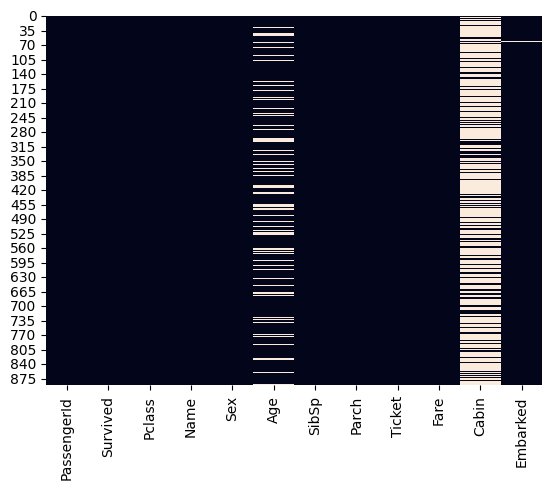

In [14]:
#Aqui podemos ver los valores nulos que tenemos en un heatmap(seaborn)
sns.heatmap(df3.isnull() , cbar=False ) 

Para rellenar los valores nulos de la edad, lo que hacemos es, sacar la media de la columna y lo rellenamos con la media.

In [15]:
#Le asignamos el nombre media_age ala media de la edad de titanic, nos devuelve la media y tambien nos rellena los valores que faltan con la media 
media_age = df3['Age'].mean()
df3['Age'].fillna(media_age, inplace=True)

In [16]:
media_age

29.69911764705882

In [17]:
df3.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


<Axes: >

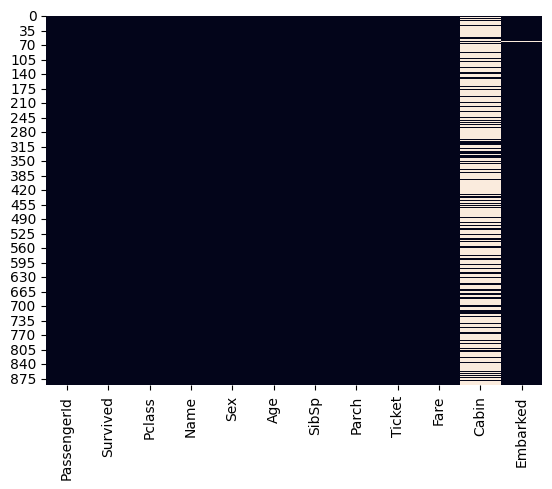

In [18]:
#Os muestro el heatmap que estoy utilizando para ver los valores nulo, y como podeis ver ya he rellenado los valores que faltaban con la media_age
sns.heatmap(df3.isnull()  , cbar=False) 

Para rellenar los nulos de la columna 'cabin', no veo ningun sentido rellenar con algun valor. Ademas, creo que para mi no me aporta nada. Entonces, he decidido eliminar la columna.

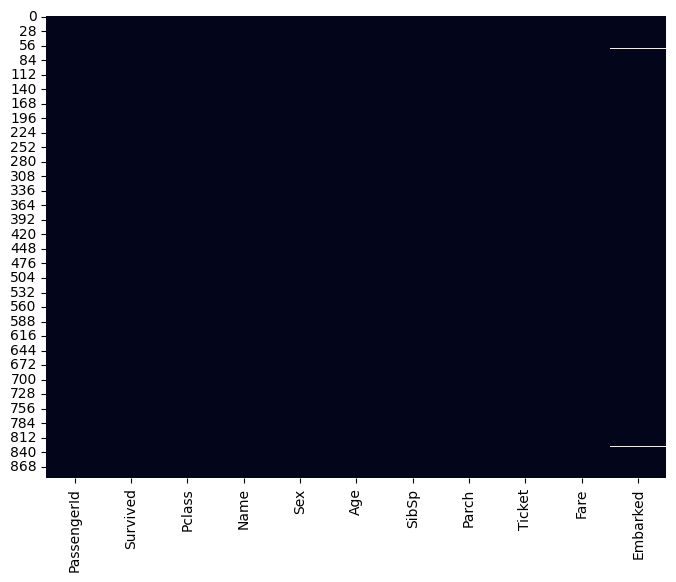

In [19]:
#Eliminamos la columna 'Cabin' , con un .drop
df3.drop(columns=['Cabin'], inplace=True)

# Crear un heatmap para visualizar la ausencia de la columna "Cabin"
plt.figure(figsize=(8, 6))
sns.heatmap(df3.isnull(), cbar=False)
plt.show()

Para acabar, rellenaremos los dos valores nulos de 'embarked' con un "Unknow"


In [20]:
#Rellenamos con un "Unknown" los dos nulos que aparecian en la columna "Embarked"
df3['Embarked'].fillna('Unknown', inplace=True)



In [21]:
#Vemos mas especificamente que hay dos "Unknown"
df3['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

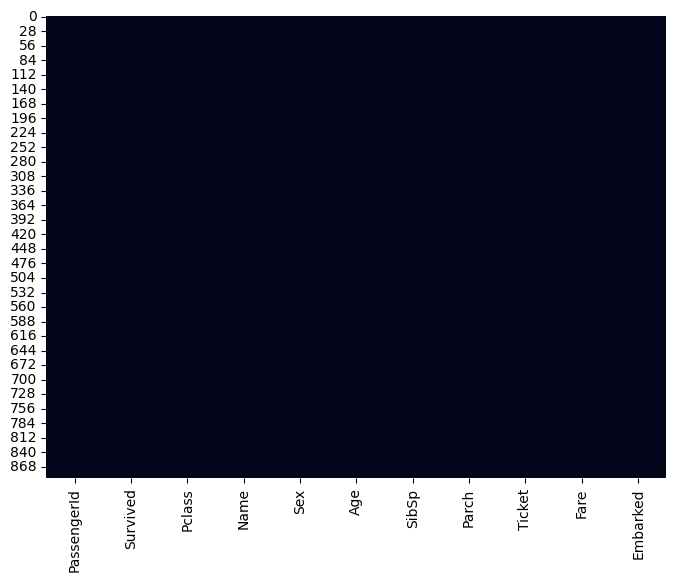

In [22]:
#Vemos que ya no tenemos ningun valor nulo
plt.figure(figsize=(8, 6))
sns.heatmap(df3.isnull(), cbar=False)
plt.show()

### Analisis de la columna 'Survived'

In [23]:
#Una pequeña informacion sobre la columna 'Survived'
df3['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [24]:
# Análisis de supervivencia
sobrevivientes = df3['Survived'].value_counts()


In [25]:
sobrevivientes

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
#Aqui podemos ver como sacamos el porcentaje de la media de los que sobrevivieron en el titanic
media_survived=df3['Survived'].mean()

In [27]:
media_survived * 100

38.38383838383838

Un gráfico circular de la columna 'SURVIVED'

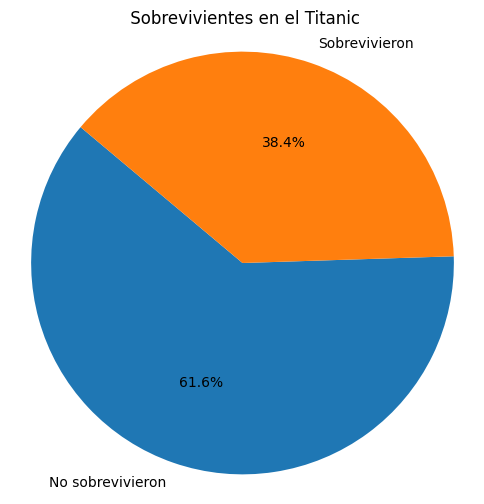

In [28]:
# Crear un gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(sobrevivientes, labels=["No sobrevivieron", "Sobrevivieron"], autopct='%1.1f%%', startangle=140) #para mostrar los porcentajes en las porciones del gráfico de pastel, el angulo donde empieza el trozo de los sobrevivientes
plt.title(" Sobrevivientes en el Titanic")
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

plt.show()

### Analisis de la columna "Sex"

In [29]:
df3['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Grafica (sobrevivientes y mujer/Hombre)

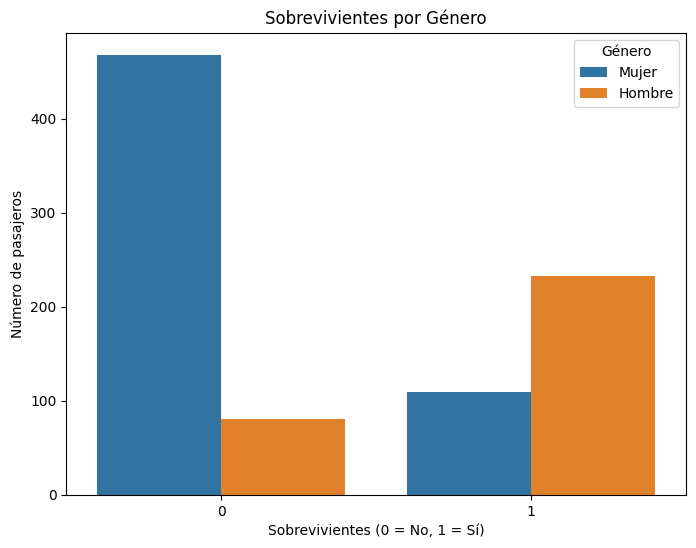

In [30]:
# Crear un gráfico de barras apiladas para comparar "Survived" y "Sex"
plt.figure(figsize=(8, 6))
sns.countplot(data=df3, x="Survived", hue="Sex")
plt.title("Sobrevivientes por Género")
plt.xlabel("Sobrevivientes (0 = No, 1 = Sí)")
plt.ylabel("Número de pasajeros")
plt.legend(title="Género", labels=["Mujer", "Hombre"])
plt.show()

Aqui en esta grafica he comparado dos columnas como veis, 'Survived' y 'Sex'.
En la interpretacion de esta grafica , las conclusiones que podemos sacar son muy faciles de ver.
Lo que podemos decir que de los que no sobrevivieron, un porcentaje alto eran mujeres y de los que sobrevivieron alreves; sobrevivieron mas hombres que mujeres.
La conclusion general; Sobrevivieron mas hombres que mujeres en el accidente del titanic.

Por ejemplo, el sexo no he cambiado a un numero entero porque nos puede generar errores y creo que se ve mejor el sexo como objeto

### Analisis de la columna 'FARE'

In [31]:
#Una pequeña informacion sobre la columna 'Fare'
df3['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [32]:
#Algunos valores de la columna, el precio del billete y cuantos billetes de ese valor se compraron
df3['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [33]:
#La media de la columna 'Fare' (La media del Precio de la tarifa)
df3['Fare'].mean()

32.204207968574636

In [34]:
#Aqui el precio mas alto de la tarifa
df3['Fare'].max()

512.3292

In [35]:
df3['Fare'].min()

0.0

### Analisis de la columna 'Age'

In [36]:
df3['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [37]:
df3['Age'].max()

80.0

In [38]:
df3['Age'].min()

0.42

Grafica (edades y tarifas)

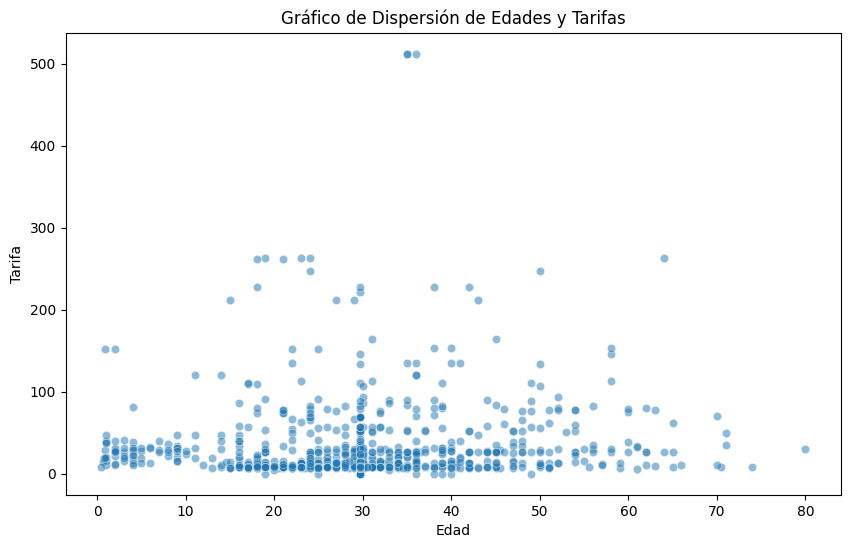

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x="Age", y="Fare", alpha=0.5)   #Creamos un gráfico de dispersión utilizando sns.scatterplot(),usamos alpha para controlar la transparencia de los puntos.
plt.title("Gráfico de Dispersión de Edades y Tarifas")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()

Como podemos ver en esta grafica, cada punto representa a un pasajero.En el eje X vemos la edad de los pasajeroa y en el eje Y la tarifa que pagaron los pasajeros. Estas son algunas conclusiones:

1, En el gráfico, podemos observar que la mayoria de los pasajeros se encuentran en el rango de edad de 20 a 40 años. Esto quiere decir que el Titanic llevaba una población adulta.

2, las tarifas varían bastante. Algunos pasajeros pagaron tarifas muy bajas, mientras que otros pagaron tarifas mas altas.

3, A pesar de la diversidad en las tarifas, hay una concentracion importante de pasajeros que pagaron tarifas bajas,entre 0 a 100 unidades.

### Analisis de la columna "PCLASS"

In [40]:
#Una pequeña informacion sobre la columna 'Pclass'
df3['Pclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [41]:
#Algunos valores de la columna, cuantos pasajeros son de cada clase
df3['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [42]:
#Calculamos la media y la mediana de las columnas 'Age' y 'Fare' por la clase de pasajeros
estadistica_por_class = df3.groupby('Pclass')[['Age', 'Fare']].agg(['mean', 'median']) #Utilizo 'agg' (de agregación) para calcular tanto la media como la mediana para estas dos columnas en cada grupo de clases de pasajeros.

# Las columnas que necesito para los valores que le he pedido
estadistica_por_class.columns = ['Age_Mean', 'Age_Median', 'Fare_Mean', 'Fare_Median']


In [43]:
estadistica_por_class

,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Pclass,,,,
1,37.048118,35.000000,84.154687,60.2875
2,29.866958,29.699118,20.662183,14.2500
3,26.403259,29.699118,13.675550,8.0500


Aqui podemos ver las estadisticas de media y mediana de las edades y tarifas, desglosadas por clase de pasajeros en el Titanic. Estos son las conclusiones que he sacado:

1, En general, las edades promedio y medianas de los pasajeros disminuyen a medida que la clase de pasajeros aumenta. Esto quiere decir que las clase (Pclass 1) tienden a incluir pasajeros mas adultos.

2, Las tarifas promedio y medianas son mas altas en la clase 1 (Pclass 1) que en las clases 2 y 3. Esto quiere decir que los de las clases mas altas pagaron tarifas más altas por el pase al barco.

3, En todas las clases, la mediana de la edad es mas pequeño que la media. Esto quiere decir que en cada clase, hay algunos pasajeros mayores que hacen tener un pico en la media, pero la mayoría son jovenes.Tambien es verdad que en todas las clases de pasajeros, la mediana de las tarifas es menor que la media.Esto nos dice que hay algunos pasajeros que pagaron tarifas muy altas que elevan la media de tarifas en cada clase.

4, En la clase 3 (Pclass 3) tiene la media de edad y la mediana mas bajas, lo que indicaria que los pasajeros seran mas jóvenes.La clase 3 tambien tiene la media y la mediana de las tarifas mas bajas, los pasajeros de esta clase pagaron menos por sus pases de barco.

### Analisis de la columna "Embarked"

In [44]:
#Una pequeña informacion sobre la columna 'Embarked'
df3['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [45]:
#Algunos valores de la columna, cuantos pasajeros salieron de Southampton, Queenstown y Cherbourg
df3['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

Aqui lo que podemos ver es que de Southampton salieron los que mas pasajeros 644, de Queenstown 168 y Cherbourg unos poquitos 77. Y sabemos que la informacion de donde salieron esos dos pasajeros que es "Desconocido", que no se sabe de donde salieron.

Grafica (La probabilidad de supervivencia por puerto de embarque)

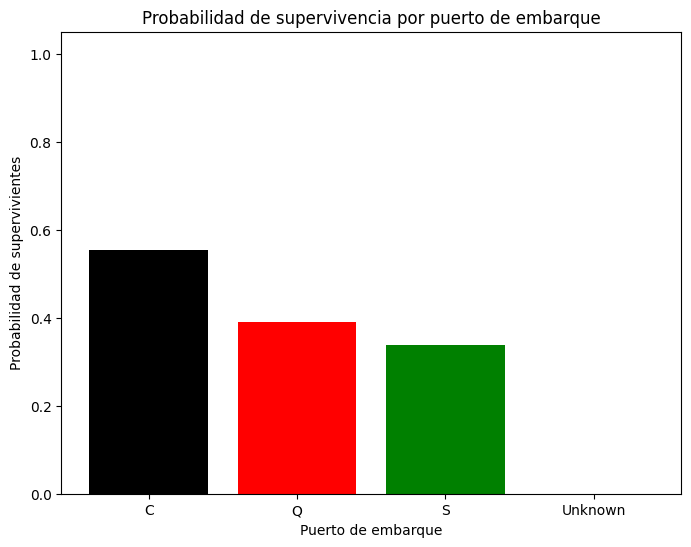

In [46]:

# Agrupamos datos por puerto de embarque y calcula la probabilidad (media) de supervivencia 
media_sup_embark = df3.groupby('Embarked')['Survived'].mean()
colors = ['black', 'red', 'green', 'white']

plt.figure(figsize=(8, 6))
plt.bar(media_sup_embark.index, media_sup_embark, color=colors)
plt.title("Probabilidad de supervivencia por puerto de embarque")
plt.xlabel("Puerto de embarque")
plt.ylabel("Probabilidad de supervivientes")
plt.show()

Aquí hay algunas conclusiones basadas en la gráfica:

1, La grafica destaca que hay diferencias en las tasas de supervivencia entre los puertos de embarque.Por ejemplo, el puerto de embarque 'Cherbourg' (C) tiene la tasa de supervivencia más alta, seguido por 'Queenstown' (Q), mientras que 'Southampton' (S) tiene la tasa mas baja.

2, La barra negra (Cherbourg) es la más alta de los puertos de embarque en la grafica, lo que indica que los pasajeros que embarcaron en Cherbourg tenian la probabilidad mas alta de sobrevivir. 

3, La barra roja (Queenstown) es la segunda mas alta, significa que los pasajeros que embarcaron en Queenstown tambien tenian una probabilidad bastante alta de sobrevivir.

4, La barra verde (Southampton) es la más baja, lo que indica que los pasajeros que embarcaron en Southampton tenian la probabilidad mas baja de sobrevivir. 

5, La barra (Unknown) son los 2 pasajeros que no sabemos donde embarcaron. Y como no sabemos donde embarcaron no podemos saber la probabilidad de supervivencia.

#### CONCLUSIONES GENERALES

En este proyecto de análisis de datos del Titanic, hemos analizado un conjunto de datos histórico que detalla la información de los pasajeros a bordo del Titanic. Algunas de las conclusiones más destacadas son estas:

1. **Impacto de la Clase de Pasajeros**: La clase de pasajeros tenía un impacto significativo en las tasas de supervivencia. Los pasajeros de primera clase tenían una probabilidad mucho mayor de sobrevivir en comparación con los de segunda y tercera clase.

2. **Género y Supervivencia**: La variable del género también influyó en las tasas de supervivencia. Las mujeres tenían una probabilidad mucho mayor de sobrevivir que los hombres, lo que se ilustra claramente en el gráfico de barras.

3. **Distribución de Edades**: La mayoría de los pasajeros eran adultos jóvenes, pero hubo un número significativo de niños y ancianos a bordo. Las tasas de supervivencia variaron según las edades, con los niños y los adultos jóvenes teniendo tasas más altas.

4. **Puerto de Embarque**: El puerto de embarque también tuvo un impacto en las tasas de supervivencia, con pasajeros que embarcaron en Cherbourg mostrando una tasa más alta en comparación con los otros puertos.

In [47]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [48]:
df3.to_csv("Titanic_limpio.csv")